# Project: Investigate a TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The following report is the analysis of data collection of about 10,000 movies during specific time interval based on several factors like, budget, genre, production companies ...etc. and how those factors influence the success of the Movies.

## Questions will be answered?
- Which genres are most popular from year to year?
- What month is considered best for releasing movies?
- What is the impact of the votes count on the vote rating?
- How did the numbe of produced movies change over time?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime as dt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load tmdb csv file and preview the first 5 rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info(),
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Preview stats for each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


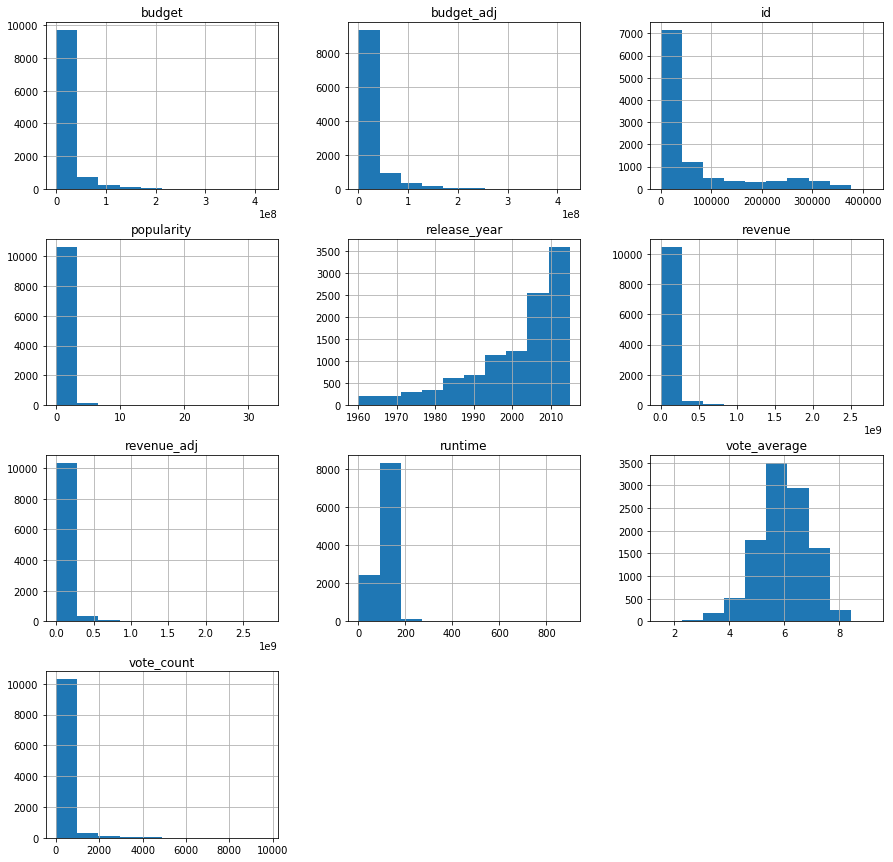

In [5]:
# Preview overall distribution of data from each properties
df.hist(figsize=(15,15));

### Data Cleaning
In this section we will do the following :
- Drop movies with zero values budgets, revenues and run time.
- separate columns with several values.
- Drop columns that are not useful for analysis.

In [6]:
# Drop movies with zero values budgets, revenues and run time.
df['revenue_adj'] = df['revenue_adj'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
df['budget_adj'] = df['budget_adj'].replace(0, np.NaN)
df['budget'] = df['budget'].replace(0, np.NaN)
df['runtime'] = df['runtime'].replace(0, np.NaN)

df.dropna(axis=0, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null float64
revenue                 1287 non-null float64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null float64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null object
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-nu

In [7]:
# Seperating columns with several values

df_cast = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_dir = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_key = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_genres = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_prod = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Check the splitting
df_cast.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [8]:
#Check the splitting
df_dir.head()

,director_1,director_2,director_3,director_4,director_5,director_6
0,Colin Trevorrow,None,None,None,None,None
1,George Miller,None,None,None,None,None
2,Robert Schwentke,None,None,None,None,None
3,J.J. Abrams,None,None,None,None,None
4,James Wan,None,None,None,None,None


In [9]:
#Check the splitting
df_key.head()

,keywords_1,keywords_2,keywords_3,keywords_4,keywords_5
0,monster,dna,tyrannosaurus rex,velociraptor,island
1,future,chase,post-apocalyptic,dystopia,australia
2,based on novel,revolution,dystopia,sequel,dystopic future
3,android,spaceship,jedi,space opera,3d
4,car race,speed,revenge,suspense,car


In [10]:
#Check the splitting
df_genres.head()

,genres_1,genres_2,genres_3,genres_4,genres_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [11]:
#Check the splitting
df_prod.head()

,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [12]:
#Joining the dataframes
df = df.join([df_cast, df_dir, df_key, df_genres, df_prod])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 47 columns):
id                        1287 non-null int64
imdb_id                   1287 non-null object
popularity                1287 non-null float64
budget                    1287 non-null float64
revenue                   1287 non-null float64
original_title            1287 non-null object
cast                      1287 non-null object
homepage                  1287 non-null object
director                  1287 non-null object
tagline                   1287 non-null object
keywords                  1287 non-null object
overview                  1287 non-null object
runtime                   1287 non-null float64
genres                    1287 non-null object
production_companies      1287 non-null object
release_date              1287 non-null object
vote_count                1287 non-null int64
vote_average              1287 non-null float64
release_year              1287 non-null int

In [13]:
#Drop columns that are not useful for analysis
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'tagline'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 38 columns):
id                        1287 non-null int64
popularity                1287 non-null float64
budget                    1287 non-null float64
revenue                   1287 non-null float64
original_title            1287 non-null object
runtime                   1287 non-null float64
release_date              1287 non-null object
vote_count                1287 non-null int64
vote_average              1287 non-null float64
release_year              1287 non-null int64
budget_adj                1287 non-null float64
revenue_adj               1287 non-null float64
cast_1                    1287 non-null object
cast_2                    1285 non-null object
cast_3                    1285 non-null object
cast_4                    1283 non-null object
cast_5                    1278 non-null object
director_1                1287 non-null object
director_2                110 non-null obj

In [14]:
#check duplicate
df.duplicated().sum()

0

In [15]:
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
release_date               object
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2      

<a id='eda'></a>
## Exploratory Data Analysis

After cleanning the data and removing unnecessary ones. Now the data is ready to be used to answer questions.

### Research Question 1: Which genres are most popular from year to year?

In [16]:
# Select genres columns and release year from the original data frame
df_genres1 = df.loc[:, 'genres_1': 'genres_5' ]
df_genres_year = df_genres1.join(df['release_year'])
df_genres_year.head()

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015


In [17]:
#creates an array of years
df_years = df_genres_year['release_year'].unique()
#creates a list for most common genres based on years and production and votes
most_common_genres = []

for year in df_years:
    df_filter_year = df_genres_year[df_genres_year['release_year'] == year] 
    df_drop_release = df_filter_year.drop(['release_year'], axis = 1)
    df_count = df_drop_release.stack().value_counts().idxmax() 
    df_mask_year = df[df['release_year'] == year]
    df_max_mean_vote = df_mask_year.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if df_count == df_max_mean_vote:
        is_equal = 'Equal'
    else:
        is_equal = 'Not equal'
    most_common_genres.append((year, df_count, df_max_mean_vote, is_equal))

#create df for most_common genres
df_most_common_genres = pd.DataFrame(most_common_genres, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_common_genres

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Comedy,Comedy,Equal
1,1962,Action,Adventure,Not equal
2,1963,Action,Action,Equal
3,1964,Comedy,Adventure,Not equal
4,1965,Action,Adventure,Not equal
5,1967,Action,Action,Equal
6,1969,Action,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Crime,Drama,Not equal
9,1973,Thriller,Drama,Not equal


In [18]:
df_most_common_genres['is_equal'].value_counts()

Not equal    42
Equal         9
Name: is_equal, dtype: int64

we can see that only in 9 occasions the most frequent produced genres was also voted as best genre but in the other 42 occasions the two values differed.

### Research Question 2: What month is considered best for releasing movies?

In [19]:
# Extract the month of release for every movie in a new column
df_best_month = df
df_best_month['release_date'] = pd.to_datetime(df_best_month['release_date'])
df_best_month['release_month'] = df_best_month['release_date'].dt.month

Text(0,0.5,'revenue')

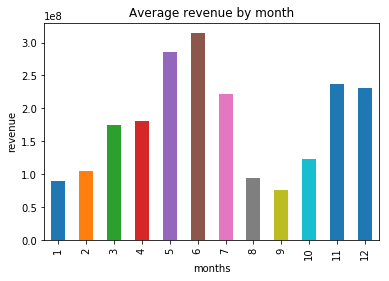

In [20]:
revenue_by_month = df_best_month.groupby('release_month')['revenue'].mean()
revenue_by_month.plot.bar( title="Average revenue by month")
plt.xlabel('months')
plt.ylabel('revenue')

As we see the best two months are June and May.

### Research Question 3: What is the impact of the votes count on the vote rating?

In [21]:
# Select 'vote_count' and 'vote_average' columns from the original data frame
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#select votes for vote count larger than the mean count
df_vote_larger_mean = df_vote[df_vote['vote_count'] > df_vote['vote_count'].mean()]

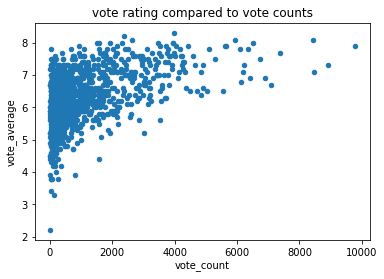

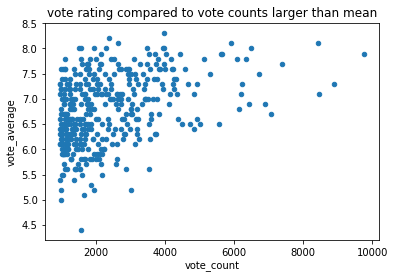

In [22]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter', title="vote rating compared to vote counts")
df_vote_larger_mean.plot(x='vote_count', y='vote_average', kind='scatter', title="vote rating compared to vote counts larger than mean")

In [23]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.000000,0.464812
vote_average,0.464812,1.000000


In [24]:
df_vote_larger_mean.corr()

,vote_count,vote_average
vote_count,1.000000,0.393406
vote_average,0.393406,1.000000


We can see that movies with a higher vote_count did't lead to a higher vote_average.

### Research Question 4: How did the numbe of produced movies change over time?

In [25]:
#creates a list number of movies per year
number_movies_year = []

for year in df_years:
    df_movie_year = df_genres_year[df_genres_year['release_year'] == year]
    no_in_year = len(df_movie_year.index)
    number_movies_year.append((year, no_in_year))
    
#creates df for number of movies per year
df_numbe_movies_year = pd.DataFrame(number_movies_year, columns=['release_year', 'number_of_movies']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_numbe_movies_year

,release_year,number_of_movies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


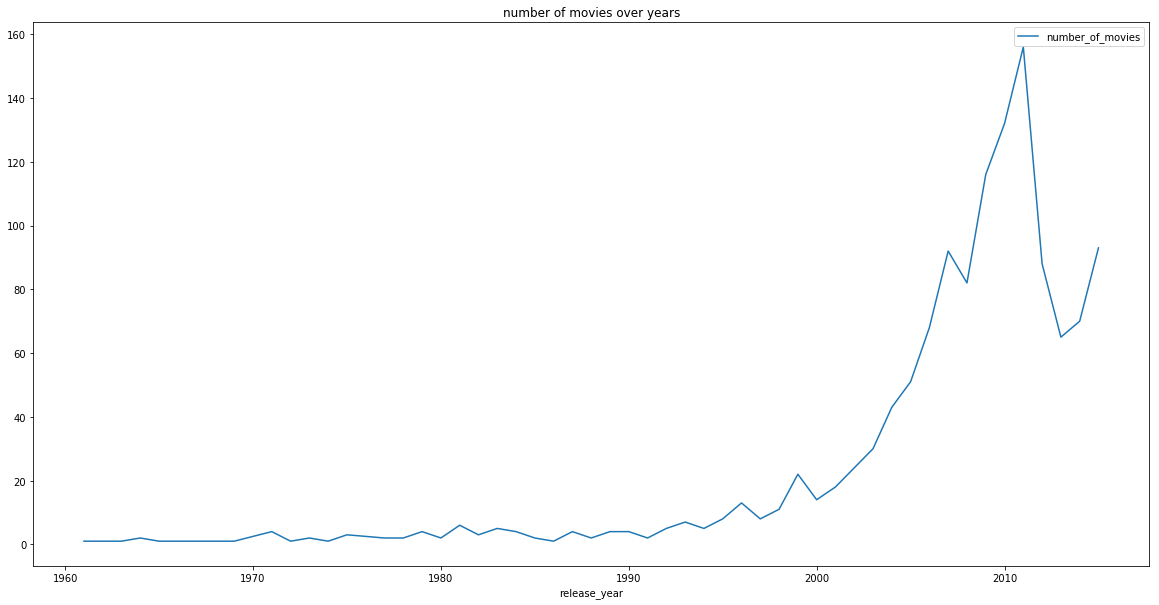

In [26]:
df_numbe_movies_year.plot(x='release_year', y='number_of_movies', kind='line', figsize=(20,10), title="number of movies over years")

We can see that the number of produced movies was the largest at 2011.

<a id='conclusions'></a>
## Conclusions


The first research question "Which genres are most popular from year to year?" shows that the most popular genre differed a lot. only in 9 occasions the most frequent produced genres was also voted as best genre but in the other 42 occasions the two values differed.

The second research question "What month is considered best for releasing movies?" shows that the best two months for realesing movies are June and May.

The third research question "What is the impact of the votes count on the vote rating?" shows that movies with a higher vote_count did't lead to a higher vote_average.

The fifth research question "How did the numbe of produced movies change over time?" show that the number of produced movies per year was slightly aroud the same average from 1961 to 2000 but a clear increas from 2000 to 2011 has been observed and started to decrease agian -not to the same number before 2000- from 2011 till 2015.